In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement

station = base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [9]:
# Find the most recent date in the data set.
late_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
late_date

('2017-08-23',)

In [10]:
# Design a Query to Retrieve the Last 12 Months of Precipitation Data and plot the results
# Starting from the most recent data point in the database. 


# Calculate the Date 1 Year Ago from the Last Data Point in the Database
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a Query to Retrieve the Data and Precipitation Scores
precip_score= session.query(measurement.date, measurement.prcp) \
                      .filter(measurement.date >= dt.datetime.strftime(one_year, "%Y-%m-%d")) \
                      .filter(measurement.prcp.isnot(None)) \
                      .order_by(measurement.date).all()

# Save the Query Results as a Pandas DataFrame and Set the Index to the Date Column & Sort the Dataframe Values by `date`
# Sort the dataframe by date
precip_df = pd.DataFrame(precip_score, columns=["Date","Precipitation"])
precip_df.set_index("Date", inplace=True,)
precip_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


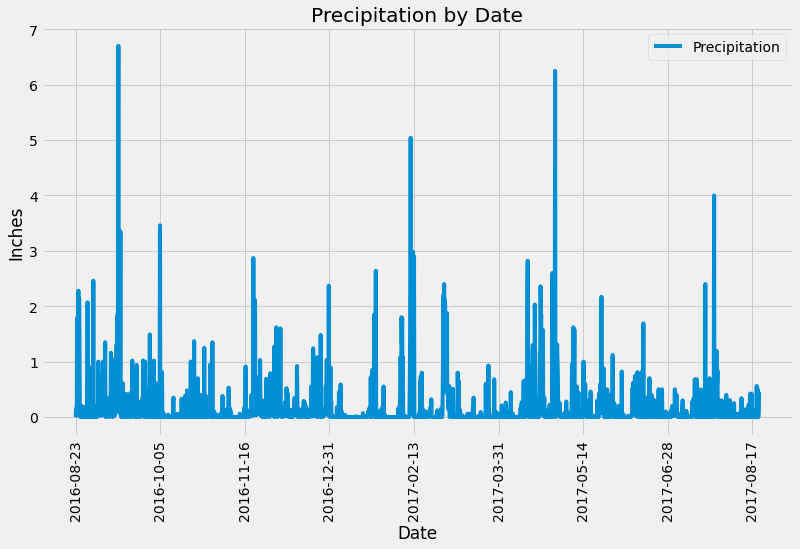

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(title="Precipitation by Date", figsize = (12,7))
plt.legend(loc='upper right')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.show()



In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis


In [14]:
# Design a query to calculate the total number stations in the dataset
stat_count = session.query(station).group_by(station.station).count()
stat_count

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stat_act = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
stat_act

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
#Station id with the highest number of observations
active_id = session.query(measurement.station, station.name, func.count(station.id)) \
                  .filter(measurement.station == station.station) \
                  .group_by(station.station, station.name) \
                  .order_by(func.count(station.id).desc()).first()
active_id




('USC00519281', 'WAIHEE 837.5, HI US', 2772)

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs = [func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]

temp_stats = session.query(*tobs).\
    filter(measurement.station == "USC00519281").all()
temp_stats


[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_data = session.query(measurement.tobs).\
    filter(measurement.date >= one_year).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date).all()

tobs_data_df = pd.DataFrame(tobs_data, columns=["TOBS"])



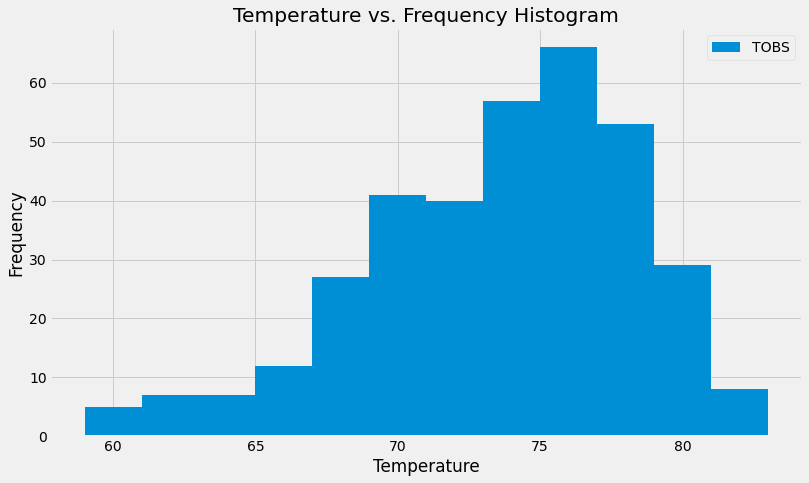

In [19]:
tobs_data_df.plot.hist(bins=12, title='Temperature vs. Frequency Histogram', figsize=(12,7))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Close Session

In [20]:
# Close Session
session.close()